# Hierarchical modeling with ArchPy

This notebook demonstrates the capabilities of ArchPy to simulate any level of hierarchy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geone
import geone.covModel as gcm
import os
import sys
import pyvista as pv
pv.set_jupyter_backend('static')
try:
    import ArchPy
except: # if ArchPy is not installed
    print("ArchPy not installed")
    sys.path.append("../..")
    import ArchPy


from ArchPy.base import Unit, Facies, Prop, Pile, Arch_table, Surface

## Project and grid

In [2]:
T1 = Arch_table(name = "Hierarchy_is_fun", working_directory="Hierarch", seed = 10)

sx = 1
sy = 1
sz = 1
nx = 250
ny = 250
nz = 50
ox = 0
oy = 0
oz = 0
dimensions = (nx, ny, nz)
spacing = (sx, sy, sz)
origin = (ox, oy, oz)

T1.add_grid(dimensions, spacing, origin) #adding the grid

## Adding Grid ##
## Grid added and is now simulation grid ##


This exemple is purely technical and have no other purpose to test ArchPy capabilities.

ArchPy can then simulate sub-units inside other bigger units by setting the ``f_method`` (in unit ``dic_facies``) to ``SubPile``. **It is then necessary to provide an ArchPy ``Pile`` object in the ``dic_facies``**.
Below are many different examples with various hierarchical level.

## Let's create a lot of units, sub-units, ...

### C unit

In [3]:
#Let's use the same covmodels for all units for simplicity
cm = gcm.CovModel2D(elem=[("cubic", {"w":5,"r":[55,55]})])


#SubPile C32
C322 = Unit("C322",order=1,color=(0,0.3,0.4,0.2), surface=Surface(),ID=20)
C321 = Unit("C321",order=2,color=(0,0.2,0.3,0.2),
            surface=Surface(name="SC321",contact="erode", dic_surf={'int_method': 'grf_ineq', 'covmodel': cm, "mean":48.5}), ID=21
           )

PC32 = Pile("C32")
PC32.add_unit([C322,C321])

#Subpile C3
C32 = Unit("C32",order=1,color=(0,0.3,0.4,0.5), surface=Surface(),ID=7,dic_facies={"f_method":"SubPile", "SubPile":PC32}
         )
C31 = Unit("C31",order=2,color=(0,0.3,0.3,0.5), 
           surface=Surface(name="SC31", contact="erode", dic_surf={'int_method': 'grf_ineq', 'covmodel': cm, "mean":47}),
           ID=8
         )


PC3 = Pile("PC3")
PC3.add_unit([C32, C31])


#SubPile C1
C12 = Unit("C12",order=1,color=(0,0.4,0.5,0.5), surface=Surface(),ID=9
         )
C11 = Unit("C11",order=2,color=(0,0.5,0.3,0.5), 
           surface=Surface(name="SC11", contact="erode", dic_surf={'int_method': 'grf_ineq', 'covmodel': cm, "mean":36}),
           ID=10
         )

PC1 = Pile("PC1")
PC1.add_unit([C12, C11])


#subpile C
C3 = Unit("C3",order=1,color=(0,0.3,0.3,0.8), surface=Surface(),ID=4,dic_facies={"f_method":"SubPile", "SubPile":PC3}
         )
C2 = Unit("C2", order=2, color = (0,0.3,0.5,0.8),
          surface=Surface(name="SC2", contact="erode", dic_surf={'int_method': 'grf_ineq', 'covmodel': cm, "mean":45}),
          ID = 5
         )
C1 = Unit("C1", order=3, color = (0,0.5,0.3,0.8),
          surface=Surface(name="SC1", contact="erode", dic_surf={'int_method': 'grf_ineq', 'covmodel': cm, "mean":39}),
          ID = 6,
          dic_facies={"f_method":"SubPile", "SubPile":PC1}
         )
PC = Pile(name="PC")
PC.add_unit([C3, C2, C1])


C = Unit("C",order=1,color=(0,0,0.3,1), surface=Surface(),ID=1,dic_facies={"f_method":"SubPile", "SubPile":PC})

Unit C322: Surface added for interpolation
Unit C321: Surface added for interpolation
Stratigraphic unit C322 added
Stratigraphic unit C321 added
Unit C32: Surface added for interpolation
Unit C31: Surface added for interpolation
Stratigraphic unit C32 added
Stratigraphic unit C31 added
Unit C12: Surface added for interpolation
Unit C11: Surface added for interpolation
Stratigraphic unit C12 added
Stratigraphic unit C11 added
Unit C3: Surface added for interpolation
Unit C2: Surface added for interpolation
Unit C1: Surface added for interpolation
Stratigraphic unit C3 added
Stratigraphic unit C2 added
Stratigraphic unit C1 added
Unit C: Surface added for interpolation


### B unit

In [4]:
#SubPile PB
B4 = Unit("B4", order=1, color = (0.5,0.8,0,0.8), surface=Surface(),ID = 11)
B3 = Unit("B3", order=2, color = (0.2,0.8,0,0.8),
          surface=Surface(name="SB3", contact="erode", dic_surf={'int_method': 'grf_ineq', 'covmodel': cm, "mean":29}),
          ID = 12
         )
B2 = Unit("B2", order=3, color = (0,0.5,0,0.8),
          surface=Surface(name="SB2", contact="erode", dic_surf={'int_method': 'grf_ineq', 'covmodel': cm, "mean":25}),
          ID = 13
         )
B1 = Unit("B1", order=4, color = (0,0.8,0,0.8),
          surface=Surface(name="SB1", contact="erode", dic_surf={'int_method': 'grf_ineq', 'covmodel': cm, "mean":21}),
          ID = 14
         )

PB = Pile("PB")
PB.add_unit([B4,B3,B2,B1])

#unit B
B = Unit("B", order=2, color=(0,0.3,0,1),
         surface=Surface(name="SB", contact="erode", dic_surf={'int_method': 'grf_ineq', 'covmodel': cm, "mean":33}),
         ID=2,
         dic_facies={"f_method":"SubPile", "SubPile":PB}
        )

Unit B4: Surface added for interpolation
Unit B3: Surface added for interpolation
Unit B2: Surface added for interpolation
Unit B1: Surface added for interpolation
Stratigraphic unit B4 added
Stratigraphic unit B3 added
Stratigraphic unit B2 added
Stratigraphic unit B1 added
Unit B: Surface added for interpolation


### A unit

In [5]:
#Subpile PA1
A13 = Unit("A13", order=1, color=(0.4,0.4,0.4,0.4), surface=Surface(), ID = 17)
A12 = Unit("A12", order=2, color=(0.25,0.25,0.25,0.25),
         surface=Surface(name="SA12", contact="erode", dic_surf={'int_method': 'grf_ineq', 'covmodel': cm, "mean":5}),
         ID=18
        )
A11 = Unit("A11", order=2, color=(0.05,0.05,0.05,0.05),
         surface=Surface(name="SA11", contact="erode", dic_surf={'int_method': 'grf_ineq', 'covmodel': cm, "mean":2}),
         ID=19
        )

PA1 = Pile("PA1")
PA1.add_unit([A13,A12,A11])

# subpile PA
A2 = Unit("A2", order=1, color=(0.8,0.8,0.8,0.8), surface=Surface(), ID = 15)
A1 = Unit("A1", order=2, color=(0.6,0.6,0.6,0.6),
         surface=Surface(name="SA1", contact="erode", dic_surf={'int_method': 'grf_ineq', 'covmodel': cm, "mean":8}),
         ID=16,
         dic_facies={"f_method":"SubPile", "SubPile":PA1}
        )

PA = Pile("PA")
PA.add_unit([A2,A1])

A = Unit("A", order=3, color="black",
         surface=Surface(name="SA", contact="erode", dic_surf={'int_method': 'grf_ineq', 'covmodel': cm, "mean":17}),
         ID=3,
         dic_facies={"f_method":"SubPile", "SubPile":PA}
        )


Unit A13: Surface added for interpolation
Unit A12: Surface added for interpolation
Unit A11: Surface added for interpolation
Stratigraphic unit A13 added
Stratigraphic unit A12 added
Stratigraphic unit A11 added
Unit A2: Surface added for interpolation
Unit A1: Surface added for interpolation
Stratigraphic unit A2 added
Stratigraphic unit A1 added
Unit A: Surface added for interpolation


In [6]:
P1 = Pile(name = "Master_pile")
P1.add_unit([C,B,A])

T1.set_Pile_master(P1)

Stratigraphic unit C added
Stratigraphic unit B added
Stratigraphic unit A added
Pile sets as Pile master


In [7]:
T1.process_bhs()

##### ORDERING UNITS ##### 
Pile Master_pile: ordering units
Stratigraphic units have been sorted according to order
Pile PC: ordering units
Stratigraphic units have been sorted according to order
Pile PC3: ordering units
Stratigraphic units have been sorted according to order
Pile C32: ordering units
Stratigraphic units have been sorted according to order
Pile PC1: ordering units
Stratigraphic units have been sorted according to order
Pile PB: ordering units
Stratigraphic units have been sorted according to order
Pile PA: ordering units
Stratigraphic units have been sorted according to order
Pile PA1: ordering units
Stratigraphic units have been sorted according to order
units A11 and A12 have the same order
Changing orders for that they range from 1 to n
hierarchical relations set
No borehole found - no hd extracted


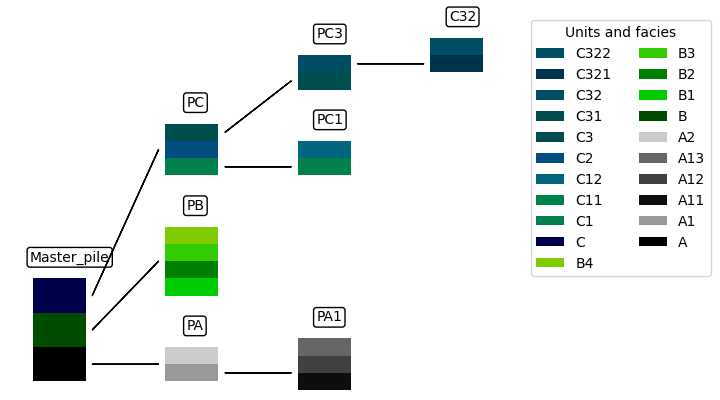

In [8]:
T1.plot_pile()

In [9]:
T1.get_sp()[0]

,name,contact,int_method,filling_method,list_facies
0,C,onlap,nearest,SubPile,[]
1,B,erode,grf_ineq,SubPile,[]
2,A,erode,grf_ineq,SubPile,[]
3,C3,onlap,nearest,SubPile,[]
4,C2,erode,grf_ineq,homogenous,[]
5,C1,erode,grf_ineq,SubPile,[]
6,C32,onlap,nearest,SubPile,[]
7,C31,erode,grf_ineq,homogenous,[]
8,C322,onlap,nearest,homogenous,[]
9,C321,erode,grf_ineq,homogenous,[]


In [10]:
T1.compute_surf(1)

Boreholes not processed, fully unconditional simulations will be tempted
########## PILE Master_pile ##########
Pile Master_pile: ordering units
Stratigraphic units have been sorted according to order

#### COMPUTING SURFACE OF UNIT A
A: time elapsed for computing surface 0.1713871955871582 s

#### COMPUTING SURFACE OF UNIT B


B: time elapsed for computing surface 0.15358853340148926 s

#### COMPUTING SURFACE OF UNIT C
C: time elapsed for computing surface 0.0 s



Time elapsed for getting domains 0.23591017723083496 s
##########################

########## PILE PC ##########
Pile PC: ordering units
Stratigraphic units have been sorted according to order

#### COMPUTING SURFACE OF UNIT C1
C1: time elapsed for computing surface 0.14860224723815918 s

#### COMPUTING SURFACE OF UNIT C2


C2: time elapsed for computing surface 0.14590835571289062 s

#### COMPUTING SURFACE OF UNIT C3
C3: time elapsed for computing surface 0.0 s



Time elapsed for getting domains 0.23490262031555176 s
##########################

########## PILE PC3 ##########
Pile PC3: ordering units
Stratigraphic units have been sorted according to order

#### COMPUTING SURFACE OF UNIT C31
C31: time elapsed for computing surface 0.14955663681030273 s

#### COMPUTING SURFACE OF UNIT C32
C32: time elapsed for computing surface 0.0 s



Time elapsed for getting domains 0.18066763877868652 s
##########################

########## PILE C32 ##########
Pile C32: ordering units
Stratigraphic units have been sorted according to order

#### COMPUTING SURFACE OF UNIT C321
C321: time elapsed for computing surface 0.1606152057647705 s

#### COMPUTING SURFACE OF UNIT C322
C322: time elapsed for computing surface 0.0 s



Time elapsed for getting domains 0.18211078643798828 s
##########################

########## PILE PC1 ##########
Pile PC1: ordering units
Stratigraphic units have been sorted according to order

#### COMPUTING SURFACE OF UNIT C11
C11: time elapsed for computing surface 0.1600797176361084 s

#### COMPUTING SURFACE OF UNIT C12
C12: time elapsed for computing surface 0.0 s



Time elapsed for getting domains 0.1767106056213379 s
##########################

########## PILE PB ##########
Pile PB: ordering units
Stratigraphic units have been sorted according to order

#### COMPUTING SURFACE OF UNIT B1
B1: time elapsed for computing surface 0.16249608993530273 s

#### COMPUTING SURFACE OF UNIT B2


B2: time elapsed for computing surface 0.14513874053955078 s

#### COMPUTING SURFACE OF UNIT B3
B3: time elapsed for computing surface 0.1664752960205078 s

#### COMPUTING SURFACE OF UNIT B4
B4: time elapsed for computing surface 0.0 s



Time elapsed for getting domains 0.2963254451751709 s
##########################

########## PILE PA ##########
Pile PA: ordering units
Stratigraphic units have been sorted according to order

#### COMPUTING SURFACE OF UNIT A1
A1: time elapsed for computing surface 0.1685497760772705 s

#### COMPUTING SURFACE OF UNIT A2
A2: time elapsed for computing surface 0.0 s



Time elapsed for getting domains 0.1797924041748047 s
##########################

########## PILE PA1 ##########
Pile PA1: ordering units
Stratigraphic units have been sorted according to order

#### COMPUTING SURFACE OF UNIT A11
A11: time elapsed for computing surface 0.14886236190795898 s

#### COMPUTING SURFACE OF UNIT A12


A12: time elapsed for computing surface 0.14902591705322266 s

#### COMPUTING SURFACE OF UNIT A13
A13: time elapsed for computing surface 0.0 s



Time elapsed for getting domains 0.23732638359069824 s
##########################


### 3.9567840099334717: Total time elapsed for computing surfaces ###


Note : Pyvista does not support rgba code, this explains the difference between the colors of the pyvsita plot and mtplotlib

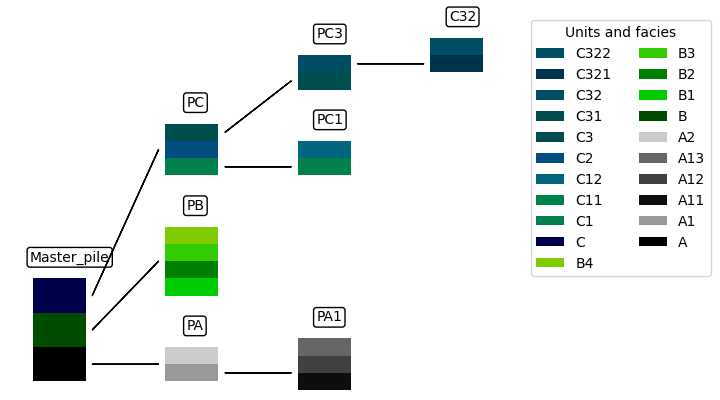

In [11]:
T1.plot_pile()

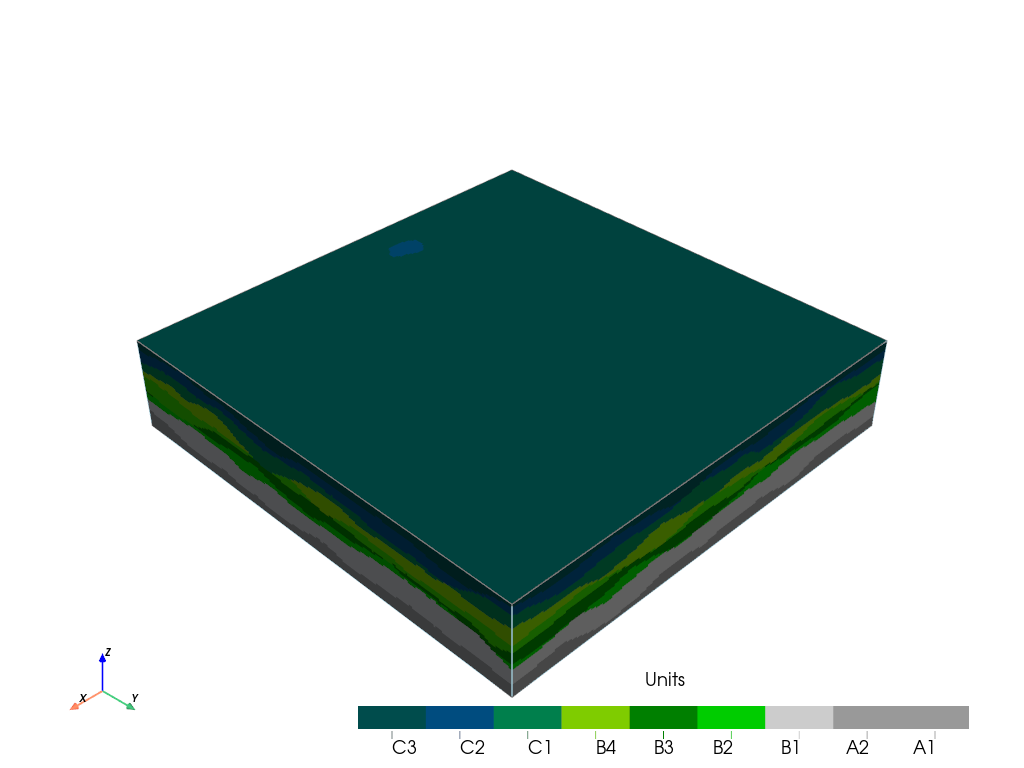

In [12]:
T1.plot_units(h_level=2)

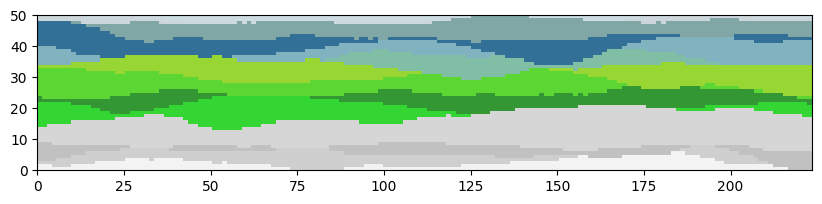

In [13]:
T1.plot_cross_section([(0,0),(100,200)],ratio_aspect=5)